In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
import itertools  

In [5]:
sample_data = pd.read_csv('../sample_data_wk5.csv')

In [7]:
real_data = pd.read_csv('../real_week5.csv')

In [8]:
sample_data[0:1000:15]

,rowid,hometeam,homescore,awayteam,awayscore,winnerteam,winnerhomeoraway,margin,total,matchupid
0,1,Bears,27,Buccaneers,13,Bears,home,14,40,49
15,16,Bears,12,Buccaneers,7,Bears,home,5,19,49
30,31,Bears,20,Buccaneers,34,Buccaneers,away,-14,54,49
45,46,Bears,12,Buccaneers,10,Bears,home,2,22,49
60,61,Bears,15,Buccaneers,10,Bears,home,5,25,49
...,...,...,...,...,...,...,...,...,...,...
930,931,Redskins,0,Rams,38,Rams,away,-38,38,58
945,946,Redskins,0,Rams,30,Rams,away,-30,30,58
960,961,Redskins,14,Rams,28,Rams,away,-14,42,58
975,976,Redskins,7,Rams,24,Rams,away,-17,31,58


In [9]:
real_data

,rowid,hometeam,homescore,awayteam,awayscore,winnerteam,winnerhomeoraway,margin,total
0,1,Bears,20,Buccaneers,19,Bears,home,1,39
1,2,Falcons,16,Panthers,23,Panthers,away,-7,39
2,3,Ravens,27,Bengals,3,Ravens,home,24,30
3,4,Texans,30,Jaguars,14,Texans,home,16,44
4,5,Chiefs,32,Raiders,40,Chiefs,home,-8,72
5,6,Patriots,0,Broncos,0,Broncos,away,0,0
6,7,Jets,10,Cardinals,30,Cardinals,away,-20,40
7,8,Steelers,38,Eagles,29,Steelers,home,9,67
8,9,Titans,0,Bills,0,Bills,away,0,0
9,10,Redskins,10,Rams,30,Rams,away,-20,40


In [10]:
nfl_marg_d={}
homecount = len(set(sample_data.hometeam))
for i,home_t in enumerate(set(sample_data.hometeam)):
    home_all_marg = list((sample_data[sample_data.hometeam == home_t]).margin)
    home_avg_marg = sum(home_all_marg)/len(home_all_marg)
    nfl_marg_d[i] = (home_t,home_avg_marg)
for j, away_t in enumerate(set(sample_data.awayteam)):
    away_all_marg = list((sample_data[sample_data.awayteam == away_t]).margin)
    away_avg_marg = sum(away_all_marg)/len(away_all_marg)
    nfl_marg_d[j+homecount] = (away_t, -away_avg_marg)
dict(itertools.islice(nfl_marg_d.items(), 5))

{0: ('49ers', 15.52),
 1: ('Texans', 2.89),
 2: ('Saints', 5.25),
 3: ('Titans', -10.1),
 4: ('Browns', -7.02)}

In [11]:
from itertools import count
nfl_comp_marg_d={}
num_games = len(real_data)
for i,team in enumerate(zip(count(step=2),real_data.hometeam,real_data.awayteam)):
    r_home_team = team [1]
    r_home_marg = int(real_data.margin[real_data.hometeam == r_home_team])
    r_away_team = team [2]
    r_away_marg = -r_home_marg
    nfl_comp_marg_d[i] = (r_home_team,r_home_marg)
    nfl_comp_marg_d[i+num_games] = (r_away_team,r_away_marg)

In [12]:
from itertools import count
d_cmp={}
num_games = len(real_data)
for i,team in enumerate(zip(count(step=2),real_data.hometeam,real_data.awayteam)):
    r_home_team = team [1]
    r_away_team = team [2]
    
    r_home_marg = int(real_data.margin[real_data.hometeam == r_home_team])
    r_away_marg = -r_home_marg
    
    p_home_all_marg = list((sample_data[sample_data.hometeam == r_home_team]).margin)
    p_home_marg = sum(p_home_all_marg)/len(p_home_all_marg)
    
    #p_away_all_marg = list((sample_data[sample_data.away == r_away_team]).margin)
    #p_away_marg = sum(p_away_all_marg)/len(p_away_all_marg)
    p_away_marg = -p_home_marg
    
    d_home_marg = r_home_marg - p_home_marg
    d_away_marg = r_away_marg - p_away_marg
    
    d_cmp[i] = (r_home_team,d_home_marg)
    d_cmp[i+num_games] = (r_away_team,d_away_marg)

In [13]:
d_cmp

{0: ('Bears', 0.6699999999999999),
 15: ('Buccaneers', -0.6699999999999999),
 1: ('Falcons', 3.2699999999999996),
 16: ('Panthers', -3.2699999999999996),
 2: ('Ravens', 15.7),
 17: ('Bengals', -15.7),
 3: ('Texans', 13.11),
 18: ('Jaguars', -13.11),
 4: ('Chiefs', -11.95),
 19: ('Raiders', 11.95),
 5: ('Patriots', -2.05),
 20: ('Broncos', 2.05),
 6: ('Jets', -12.17),
 21: ('Cardinals', 12.17),
 7: ('Steelers', -4.24),
 22: ('Eagles', 4.24),
 8: ('Titans', 10.1),
 23: ('Bills', -10.1),
 9: ('Redskins', -7.380000000000001),
 24: ('Rams', 7.380000000000001),
 10: ('49ers', -41.519999999999996),
 25: ('Dolphins', 41.519999999999996),
 11: ('Browns', 16.02),
 26: ('Colts', -16.02),
 12: ('Cowboys', -7.890000000000001),
 27: ('Giants', 7.890000000000001),
 13: ('Seahawks', -8.58),
 28: ('Vikings', 8.58),
 14: ('Saints', -5.25),
 29: ('Chargers', 5.25)}

In [16]:
df_marg = pd.DataFrame.from_dict(nfl_marg_d, orient='index',columns = ['team','margin'])
df_marg_team = df_marg.sort_values(by=['team'],ignore_index=True,ascending = False)
df_marg_top = df_marg.sort_values(by=['margin'],ignore_index=True,ascending = False)
df_marg_bot = df_marg.sort_values(by=['margin'],ignore_index=True,ascending = True)
#display(df_marg_top[:5])
#df_marg_bot[:5]
df_marg_team[:5]

,team,margin
0,Vikings,-9.58
1,Titans,-10.10
2,Texans,2.89
3,Steelers,13.24
4,Seahawks,9.58


In [14]:
df_comp_marg = pd.DataFrame.from_dict(nfl_comp_marg_d, orient='index',columns = ['team','margin'])
df_comp_marg_team = df_comp_marg.sort_values(by=['team'],ignore_index=True,ascending = False)
df_comp_marg_top = df_comp_marg.sort_values(by=['margin'],ignore_index=True,ascending = False)
df_comp_marg_bot = df_comp_marg.sort_values(by=['margin'],ignore_index=True,ascending = True)
#df_comp_marg_top[:5])
#df_comp_marg_bot[:5]
df_comp_marg_team[:5]

,team,margin
0,Vikings,-1
1,Titans,0
2,Texans,16
3,Steelers,9
4,Seahawks,1


In [18]:
df_cmp = pd.DataFrame.from_dict(d_cmp, orient='index',columns = ['team','diff_margin'])
df_cmp = df_cmp.sort_values(by=['team'],ignore_index=True,ascending = False)
df_cmp['r_margin'] = df_comp_marg_team['margin']
df_cmp['p_margin'] = df_marg_team['margin']
df_cmp_marg_srt = df_cmp.sort_values(by=['diff_margin'],ignore_index=True,ascending = False)
df_cmp_marg_srt

,team,diff_margin,r_margin,p_margin
0,Dolphins,41.52,26,-15.52
1,Browns,16.02,9,-7.02
2,Ravens,15.70,24,8.30
3,Texans,13.11,16,2.89
4,Cardinals,12.17,20,7.83
5,Raiders,11.95,8,-3.95
6,Titans,10.10,0,-10.10
7,Vikings,8.58,-1,-9.58
8,Giants,7.89,-3,-10.89
9,Rams,7.38,20,12.62


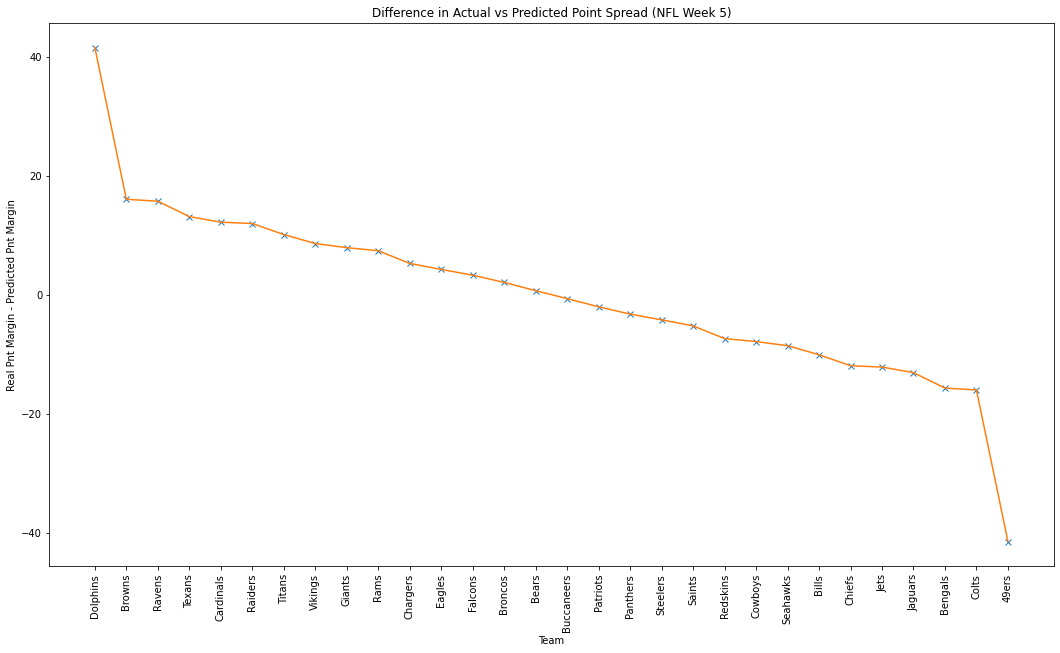

In [21]:
from matplotlib.pyplot import figure
plt.figure(figsize = (18,10))
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.diff_margin,'x')
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.diff_margin)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Real Pnt Margin - Predicted Pnt Margin')
plt.title('Difference in Actual vs Predicted Point Spread (NFL Week 5)')
plt.show()

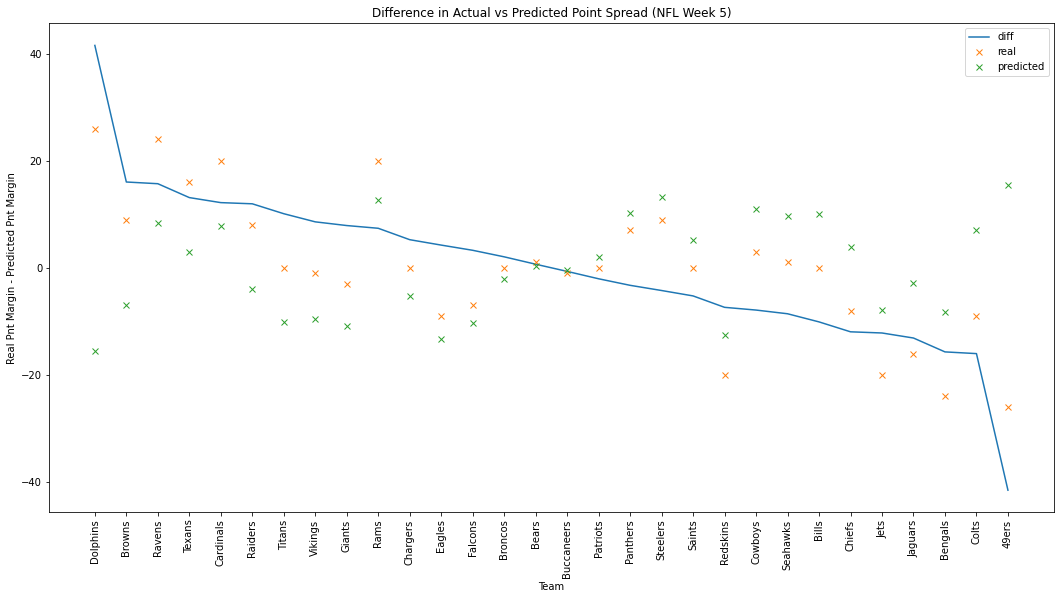

In [22]:
from matplotlib.pyplot import figure
plt.figure(figsize = (18,9))
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.diff_margin)
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.r_margin,'x')
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.p_margin,'x')
plt.legend(['diff', 'real', 'predicted'])
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Real Pnt Margin - Predicted Pnt Margin')
plt.title('Difference in Actual vs Predicted Point Spread (NFL Week 5)')
plt.show()